# Hackathon

# Applying all operation on Training Data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding 
from sklearn import preprocessing

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Evaluation matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

#importing pickle for saving model
import pickle

In [2]:
training=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\data\training.csv",index_col=0,header=0)
print(training.shape)
training.head()

(1048, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,08/27/2014 11:29,37,Female,United States,IL,NaN,No,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Yes
2,08/27/2014 11:29,44,M,United States,IN,NaN,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,No
3,08/27/2014 11:29,32,Male,Canada,NaN,NaN,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,No
4,08/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Yes
5,08/27/2014 11:30,31,Male,United States,TX,NaN,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,No


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 1 to 1048
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1048 non-null   object
 1   Age                        1048 non-null   int64 
 2   Gender                     1048 non-null   object
 3   Country                    1048 non-null   object
 4   state                      636 non-null    object
 5   self_employed              1030 non-null   object
 6   family_history             1048 non-null   object
 7   work_interfere             812 non-null    object
 8   no_employees               1048 non-null   object
 9   remote_work                1048 non-null   object
 10  tech_company               1048 non-null   object
 11  benefits                   1048 non-null   object
 12  care_options               1048 non-null   object
 13  wellness_program           1048 non-null   object
 14  seek_hel

In [4]:
training.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
count,1048,1.048000e+03,1048,1048,636,1030,1048,812,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,132,1048
unique,679,NaN,45,42,45,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,128,2
top,08/27/2014 12:31,NaN,Male,United States,CA,No,No,Sometimes,25-Jun,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.,No
freq,8,NaN,518,644,123,906,643,386,245,733,870,400,422,692,534,685,466,424,773,651,439,835,461,471,902,5,536
mean,NaN,9.541988e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.089010e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training.drop(["Timestamp","Country","self_employed","state","comments"],axis=1,inplace=True)

In [6]:
training.columns

Index(['Age', 'Gender', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')

In [7]:
for i in training.columns:
    if training[i].dtypes!="int64":
        print(i,":")
        print(training[i].value_counts())
        print()

Gender :
Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Cis Male                      2
Man                           2
Woman                         2
Female (trans)                2
Female                        2
Mail                          1
Nah                           1
something kinda male?         1
non-binary                    1
Male-ish                      1
A little about you            1
Enby                          1
Mal                           1
Femake                        1
Guy (-ish) ^_^                1
woman                         1
fluid                         1
Genderqueer                   1
Trans woman                   1
Cis Female                    1
Malr                          1
Female (cis)                  1

In [8]:
for i in training.columns:
    if training[i].dtypes!="int64":
        print(i,":")
        print(training[i].unique())
        print()

Gender :
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr']

family_history :
['No' 'Yes']

work_interfere :
['Often' 'Rarely' 'Never' 'Sometimes' nan]

no_employees :
['25-Jun' 'More than 1000' '26-100' '100-500' '05-Jan' '500-1000']

remote_work :
['No' 'Yes']

tech_company :
['Yes' 'No']

benefits :
['Yes' "Don't know" 'No']

care_options :
['Not sure' 'No' 'Yes']

wellness_program :
['No' "Don't know" 'Yes']

seek_help :
['Yes' "Don't know" 'No']

anonymity :
['Yes' "Don't know" 'No']

leave :
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very diffic

In [9]:
training=training.replace(["Male","male","M","m","Make","Man","Cis Male","Malr","something kinda male?",
                           "Guy (-ish) ^_^","maile","Malr","male leaning androgynous","Male (CIS)","Male-ish",
                           "Mal","cis male","Mail","msle","Male "], "Male")

In [10]:
training=training.replace(["Female","female","Trans-female","Cis Female","F","Woman","f","queer/she/they",
                           "Femake","woman","Genderqueer","Female  leaning androgynous","cis-female/femme","Trans woman",
                           "Female (trans)","queer","Female (cis)","Female "] ,"Female")

In [11]:
training=training.replace(["non-binary","Nah","All","Enby","fluid","Androgyne","Agender","Neuter",
                           "A little about you"] ,np.nan)

In [12]:
for i in training.columns:
    if training[i].dtypes!="int64":
        print(i,":")
        print(training[i].unique())
        print()

Gender :
['Female' 'Male' nan]

family_history :
['No' 'Yes']

work_interfere :
['Often' 'Rarely' 'Never' 'Sometimes' nan]

no_employees :
['25-Jun' 'More than 1000' '26-100' '100-500' '05-Jan' '500-1000']

remote_work :
['No' 'Yes']

tech_company :
['Yes' 'No']

benefits :
['Yes' "Don't know" 'No']

care_options :
['Not sure' 'No' 'Yes']

wellness_program :
['No' "Don't know" 'Yes']

seek_help :
['Yes' "Don't know" 'No']

anonymity :
['Yes' "Don't know" 'No']

leave :
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_health_consequence :
['No' 'Maybe' 'Yes']

phys_health_consequence :
['No' 'Yes' 'Maybe']

coworkers :
['Some of them' 'No' 'Yes']

supervisor :
['Yes' 'No' 'Some of them']

mental_health_interview :
['No' 'Yes' 'Maybe']

phys_health_interview :
['Maybe' 'No' 'Yes']

mental_vs_physical :
['Yes' "Don't know" 'No']

obs_consequence :
['No' 'Yes']

treatment :
['Yes' 'No']



In [13]:
training.isnull().sum()

Age                            0
Gender                         9
family_history                 0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
treatment                      0
dtype: int64

In [14]:
training["Gender"].fillna(training["Gender"].mode()[0],inplace=True)
# training["self_employed"].fillna(training["self_employed"].mode()[0],inplace=True)
training["work_interfere"].fillna(training["work_interfere"].mode()[0],inplace=True)
# training["state"].fillna(training["state"].mode()[0],inplace=True)

In [15]:
training.isnull().sum()

Age                          0
Gender                       0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
treatment                    0
dtype: int64

In [16]:
training.columns

Index(['Age', 'Gender', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')

## Pre-processing

In [17]:
# For preprocessing the data
le=preprocessing.LabelEncoder()

colname=['Gender', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment']

for x in colname:
    training[x]=le.fit_transform(training[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    print()

Feature Gender
mapping {'Female': 0, 'Male': 1}

Feature family_history
mapping {'No': 0, 'Yes': 1}

Feature work_interfere
mapping {'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3}

Feature no_employees
mapping {'05-Jan': 0, '100-500': 1, '25-Jun': 2, '26-100': 3, '500-1000': 4, 'More than 1000': 5}

Feature remote_work
mapping {'No': 0, 'Yes': 1}

Feature tech_company
mapping {'No': 0, 'Yes': 1}

Feature benefits
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature care_options
mapping {'No': 0, 'Not sure': 1, 'Yes': 2}

Feature wellness_program
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature seek_help
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature anonymity
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature leave
mapping {"Don't know": 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very difficult': 3, 'Very easy': 4}

Feature mental_health_consequence
mapping {'Maybe': 0, 'No': 1, 'Yes': 2}

Feature phys_health_consequence
mapping {'Maybe': 0, 'No': 1, 'Yes': 

In [18]:
training.dtypes

Age                          int64
Gender                       int32
family_history               int32
work_interfere               int32
no_employees                 int32
remote_work                  int32
tech_company                 int32
benefits                     int32
care_options                 int32
wellness_program             int32
seek_help                    int32
anonymity                    int32
leave                        int32
mental_health_consequence    int32
phys_health_consequence      int32
coworkers                    int32
supervisor                   int32
mental_health_interview      int32
phys_health_interview        int32
mental_vs_physical           int32
obs_consequence              int32
treatment                    int32
dtype: object

In [19]:
training.head()

,Age,Gender,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
S.No,,,,,,,,,,,,,,,,,,,,,,
1,37,0,0,1,2,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,1
2,44,1,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3,32,1,0,2,2,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,0
4,31,1,1,1,3,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,1
5,31,1,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,0


In [20]:
training.shape

(1048, 22)

## Data Visualization

<AxesSubplot:>

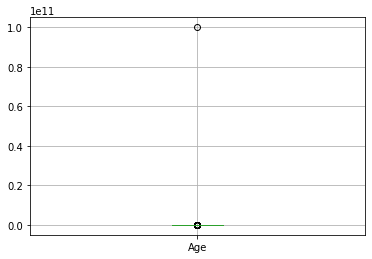

In [21]:
training.boxplot(column="Age")

In [22]:
print(training.Age.min())
print(training.Age.max())

-1726
99999999999


## Outlier imputation

(1015, 22)
(33, 22)
13.5
31
(1048, 22)


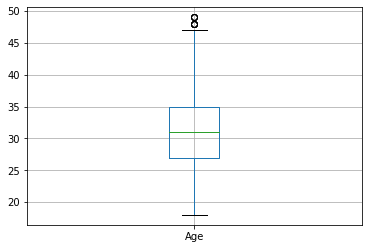

In [23]:
#for value in colname:
q1 = training['Age'].quantile(0.25) #first quartile value
q3 = training['Age'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

training_include = training.loc[(training['Age'] >= low) & \
                                (training['Age'] <= high)] # meeting the acceptable range
training_exclude = training.loc[(training['Age'] < low) | (training['Age'] > high)] #not meeting the acceptable range

print(training_include.shape)
print(training_exclude.shape)

print(low)

Age_mean=int(training_include.Age.mean()) #finding the mean of the acceptable range
print(Age_mean)

#imputing outlier values with mean value
training_exclude.Age=Age_mean

#getting back the original shape of df
training_rev=pd.concat([training_include,training_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(training_rev.shape)

training_rev.boxplot(column=["Age"])
plt.show()

## Creating X and Y

In [24]:
X = training_rev.values[:,0:-1]
Y = training_rev.values[:,-1]

In [25]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.93029832 -2.0035853  -0.79363722 ... -0.99710225  1.38846784
  -0.40232142]
 [ 2.07345888  0.49910528 -0.79363722 ...  0.38695491 -0.99306128
  -0.40232142]
 [ 0.11375507  0.49910528 -0.79363722 ...  1.77101207  0.19770328
  -0.40232142]
 ...
 [-0.04955358  0.49910528 -0.79363722 ... -0.99710225  0.19770328
   2.48557482]
 [-0.04955358  0.49910528 -0.79363722 ... -0.99710225  0.19770328
   2.48557482]
 [-0.04955358  0.49910528  1.26002156 ...  1.77101207  1.38846784
   2.48557482]]


## Split the data into test and train

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

## Logistic 

In [27]:
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0),

In [28]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[121  40]
 [ 41 113]]
Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       161
           1       0.74      0.73      0.74       154

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.74       315
weighted avg       0.74      0.74      0.74       315

Accuracy of the model:  0.7428571428571429


## Tune Logistic model

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [30]:
classifier_tune=LogisticRegression()

classifier_tune.fit(X_train,Y_train)

Y_pred=classifier_tune.predict(X_test)

print(list(zip(Y_test,Y_pred)))
print()
print(list(zip(training.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0),

In [31]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[121  40]
 [ 41 113]]
Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       161
           1       0.74      0.73      0.74       154

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.74       315
weighted avg       0.74      0.74      0.74       315

Accuracy of the model:  0.7428571428571429


In [32]:
# store the predicted probabilities
y_pred_prob = classifier_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.76718563 0.23281437]
 [0.43982736 0.56017264]
 [0.51747948 0.48252052]
 [0.80168958 0.19831042]
 [0.87265034 0.12734966]
 [0.29121039 0.70878961]
 [0.80553396 0.19446604]
 [0.24322017 0.75677983]
 [0.12563745 0.87436255]
 [0.16825797 0.83174203]
 [0.05475615 0.94524385]
 [0.86852474 0.13147526]
 [0.60469513 0.39530487]
 [0.84364963 0.15635037]
 [0.37943028 0.62056972]
 [0.53109136 0.46890864]
 [0.80379072 0.19620928]
 [0.3029665  0.6970335 ]
 [0.8412145  0.1587855 ]
 [0.74105458 0.25894542]
 [0.31275123 0.68724877]
 [0.46996802 0.53003198]
 [0.28536338 0.71463662]
 [0.67921886 0.32078114]
 [0.36675098 0.63324902]
 [0.25193347 0.74806653]
 [0.4126334  0.5873666 ]
 [0.52591501 0.47408499]
 [0.19021986 0.80978014]
 [0.67164789 0.32835211]
 [0.88234978 0.11765022]
 [0.85300637 0.14699363]
 [0.66550861 0.33449139]
 [0.4732323  0.5267677 ]
 [0.07286242 0.92713758]
 [0.29233673 0.70766327]
 [0.05238974 0.94761026]
 [0.36711295 0.63288705]
 [0.82513379 0.17486621]
 [0.18558731 0.81441269]


In [33]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 89  , type 2 error : 30  , type 1 error: 59
Errors at threshold  0.41000000000000003 : 90  , type 2 error : 32  , type 1 error: 58
Errors at threshold  0.42000000000000004 : 89  , type 2 error : 33  , type 1 error: 56
Errors at threshold  0.43000000000000005 : 89  , type 2 error : 34  , type 1 error: 55
Errors at threshold  0.44000000000000006 : 88  , type 2 error : 37  , type 1 error: 51
Errors at threshold  0.45000000000000007 : 88  , type 2 error : 37  , type 1 error: 51
Errors at threshold  0.4600000000000001 : 88  , type 2 error : 39  , type 1 error: 49
Errors at threshold  0.4700000000000001 : 88  , type 2 error : 40  , type 1 error: 48
Errors at threshold  0.4800000000000001 : 84  , type 2 error : 40  , type 1 error: 44
Errors at threshold  0.4900000000000001 : 81  , type 2 error : 41  , type 1 error: 40
Errors at threshold  0.5000000000000001 : 81  , type 2 error : 41  , type 1 error: 40
Errors at threshold  0.5100000000000001 : 83  , type 2 error : 4

## AUC

In [34]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.7860369444220376


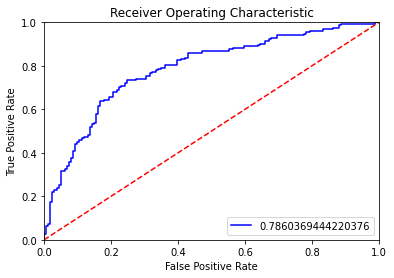

In [35]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## SGD Classifier

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [37]:
classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True,n_iter_no_change=3)

classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)

print(list(zip(training.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Age', 0.03957025927495443), ('Gender', -0.29612453262273675), ('family_history', 0.7653323145302252), ('work_interfere', 0.16120363550888206), ('no_employees', -0.10329344061496826), ('remote_work', 0.0666496858356604), ('tech_company', -0.05198207586901191), ('benefits', 0.2563985310307076), ('care_options', 0.41090919932709996), ('wellness_program', 0.1336483609122305), ('seek_help', -0.13045086848840284), ('anonymity', 0.18526403064216698), ('leave', -0.09100397527089235), ('mental_health_consequence', -0.0009697912139704471), ('phys_health_consequence', 0.0191878943543553), ('coworkers', 0.32520739147045613), ('supervisor', -0.2997323152018052), ('mental_health_interview', 0.10043635538576791), ('phys_health_interview', 0.11642397216573032), ('mental_vs_physical', 0.012292780120936132), ('obs_consequence', 0.2720833990748637)]
[0.01611423]


In [38]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[122  39]
 [ 48 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       161
           1       0.73      0.69      0.71       154

    accuracy                           0.72       315
   macro avg       0.72      0.72      0.72       315
weighted avg       0.72      0.72      0.72       315

Accuracy of the model:  0.7238095238095238


## Tune SGD Classifier

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [40]:
classifier_SGD_tune=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True, n_iter_no_change=7)

classifier_SGD_tune.fit(X_train,Y_train)

Y_pred=classifier_SGD_tune.predict(X_test)
print(list(zip(training.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Age', 0.03957025927495443), ('Gender', -0.29612453262273675), ('family_history', 0.7653323145302252), ('work_interfere', 0.16120363550888206), ('no_employees', -0.10329344061496826), ('remote_work', 0.0666496858356604), ('tech_company', -0.05198207586901191), ('benefits', 0.2563985310307076), ('care_options', 0.41090919932709996), ('wellness_program', 0.1336483609122305), ('seek_help', -0.13045086848840284), ('anonymity', 0.18526403064216698), ('leave', -0.09100397527089235), ('mental_health_consequence', -0.0009697912139704471), ('phys_health_consequence', 0.0191878943543553), ('coworkers', 0.32520739147045613), ('supervisor', -0.2997323152018052), ('mental_health_interview', 0.10043635538576791), ('phys_health_interview', 0.11642397216573032), ('mental_vs_physical', 0.012292780120936132), ('obs_consequence', 0.2720833990748637)]
[0.01611423]


In [41]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

[[120  41]
 [ 43 111]]
Accuracy of the model:  0.7333333333333333
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       161
           1       0.73      0.72      0.73       154

    accuracy                           0.73       315
   macro avg       0.73      0.73      0.73       315
weighted avg       0.73      0.73      0.73       315



In [42]:
# store the predicted probabilities
y_pred_prob = classifier_SGD_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.75250821 0.24749179]
 [0.43389165 0.56610835]
 [0.53084506 0.46915494]
 [0.77257362 0.22742638]
 [0.79941766 0.20058234]
 [0.24786136 0.75213864]
 [0.73879826 0.26120174]
 [0.31404106 0.68595894]
 [0.12240425 0.87759575]
 [0.18716871 0.81283129]
 [0.09079124 0.90920876]
 [0.85737303 0.14262697]
 [0.52306685 0.47693315]
 [0.84364147 0.15635853]
 [0.3563566  0.6436434 ]
 [0.56124927 0.43875073]
 [0.84229731 0.15770269]
 [0.2143146  0.7856854 ]
 [0.80321459 0.19678541]
 [0.75091522 0.24908478]
 [0.25264739 0.74735261]
 [0.45864206 0.54135794]
 [0.2485662  0.7514338 ]
 [0.58468389 0.41531611]
 [0.37613886 0.62386114]
 [0.26640234 0.73359766]
 [0.37204302 0.62795698]
 [0.45007587 0.54992413]
 [0.21304931 0.78695069]
 [0.66541518 0.33458482]
 [0.87038071 0.12961929]
 [0.79998141 0.20001859]
 [0.73016398 0.26983602]
 [0.44066097 0.55933903]
 [0.07637003 0.92362997]
 [0.44350409 0.55649591]
 [0.07984949 0.92015051]
 [0.40289326 0.59710674]
 [0.84992765 0.15007235]
 [0.18995731 0.81004269]


In [43]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 103  , type 2 error : 22  , type 1 error: 81
Errors at threshold  0.31 : 103  , type 2 error : 23  , type 1 error: 80
Errors at threshold  0.32 : 102  , type 2 error : 24  , type 1 error: 78
Errors at threshold  0.33 : 100  , type 2 error : 27  , type 1 error: 73
Errors at threshold  0.34 : 96  , type 2 error : 27  , type 1 error: 69
Errors at threshold  0.35000000000000003 : 94  , type 2 error : 28  , type 1 error: 66
Errors at threshold  0.36000000000000004 : 91  , type 2 error : 29  , type 1 error: 62
Errors at threshold  0.37000000000000005 : 90  , type 2 error : 30  , type 1 error: 60
Errors at threshold  0.38000000000000006 : 88  , type 2 error : 30  , type 1 error: 58
Errors at threshold  0.39000000000000007 : 87  , type 2 error : 30  , type 1 error: 57
Errors at threshold  0.4000000000000001 : 89  , type 2 error : 32  , type 1 error: 57
Errors at threshold  0.4100000000000001 : 88  , type 2 error : 32  , type 1 error: 56
Errors at threshold  0.4200000

In [44]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


In [45]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[114  47]
 [ 34 120]]
Accuracy of the model:  0.7428571428571429
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       161
           1       0.72      0.78      0.75       154

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.74       315
weighted avg       0.74      0.74      0.74       315



## KNN

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [47]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [48]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[124  37]
 [ 49 105]]
0.726984126984127
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       161
           1       0.74      0.68      0.71       154

    accuracy                           0.73       315
   macro avg       0.73      0.73      0.73       315
weighted avg       0.73      0.73      0.73       315



In [49]:
int(np.sqrt(len(X_train)))

27

## Tune KNN

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [51]:
model_KNN_tune=KNeighborsClassifier(n_neighbors=23,metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)
Y_pred=model_KNN_tune.predict(X_test)

In [52]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[128  33]
 [ 50 104]]
0.7365079365079366
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       161
           1       0.76      0.68      0.71       154

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.73       315
weighted avg       0.74      0.74      0.74       315



In [53]:
my_dict={}
for K in range(1,60):
    model_KNN_tune = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
    model_KNN_tune.fit(X_train, Y_train) 
    Y_pred = model_KNN_tune.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.6444444444444445 for K-Value: 1
Accuracy is  0.6603174603174603 for K-Value: 2
Accuracy is  0.6888888888888889 for K-Value: 3
Accuracy is  0.7047619047619048 for K-Value: 4
Accuracy is  0.6984126984126984 for K-Value: 5
Accuracy is  0.6761904761904762 for K-Value: 6
Accuracy is  0.6984126984126984 for K-Value: 7
Accuracy is  0.6984126984126984 for K-Value: 8
Accuracy is  0.7301587301587301 for K-Value: 9
Accuracy is  0.7111111111111111 for K-Value: 10
Accuracy is  0.7142857142857143 for K-Value: 11
Accuracy is  0.7238095238095238 for K-Value: 12
Accuracy is  0.7174603174603175 for K-Value: 13
Accuracy is  0.7206349206349206 for K-Value: 14
Accuracy is  0.7174603174603175 for K-Value: 15
Accuracy is  0.7174603174603175 for K-Value: 16
Accuracy is  0.7333333333333333 for K-Value: 17
Accuracy is  0.7333333333333333 for K-Value: 18
Accuracy is  0.7365079365079366 for K-Value: 19
Accuracy is  0.7206349206349206 for K-Value: 20
Accuracy is  0.726984126984127 for K-Value: 21
Ac

In [54]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

19 : 0.7365079365079366
23 : 0.7365079365079366


## Decision Tree

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [56]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1]


In [57]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[108  53]
 [ 44 110]]
0.692063492063492
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       161
           1       0.67      0.71      0.69       154

    accuracy                           0.69       315
   macro avg       0.69      0.69      0.69       315
weighted avg       0.69      0.69      0.69       315



## Tune Decision Tree

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [99]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=15,max_depth=10,min_samples_split=2,
                                         max_leaf_nodes=200)

model_DecisionTree_tune.fit(X_train,Y_train)
Y_pred=model_DecisionTree_tune.predict(X_test)
print(Y_pred)

[0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1]


In [100]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[128  33]
 [ 41 113]]
0.765079365079365
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       161
           1       0.77      0.73      0.75       154

    accuracy                           0.77       315
   macro avg       0.77      0.76      0.76       315
weighted avg       0.77      0.77      0.76       315



In [61]:
# store the predicted probabilities
y_pred_prob = model_DecisionTree_tune.predict_proba(X_test)
print(y_pred_prob)

[[1.         0.        ]
 [0.73684211 0.26315789]
 [0.125      0.875     ]
 [0.53846154 0.46153846]
 [0.73333333 0.26666667]
 [0.         1.        ]
 [0.5        0.5       ]
 [0.6875     0.3125    ]
 [0.09090909 0.90909091]
 [0.         1.        ]
 [0.125      0.875     ]
 [0.73333333 0.26666667]
 [0.47368421 0.52631579]
 [1.         0.        ]
 [0.52941176 0.47058824]
 [0.52941176 0.47058824]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.81481481 0.18518519]
 [0.72222222 0.27777778]
 [0.55555556 0.44444444]
 [0.         1.        ]
 [0.53846154 0.46153846]
 [0.29411765 0.70588235]
 [0.52941176 0.47058824]
 [0.44444444 0.55555556]
 [0.66666667 0.33333333]
 [0.125      0.875     ]
 [0.5        0.5       ]
 [0.5625     0.4375    ]
 [0.93333333 0.06666667]
 [0.73333333 0.26666667]
 [0.19230769 0.80769231]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.05882353 0.94117647]
 [0.8        0.2       ]
 [0.19230769 0.80769231]


In [62]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 91  , type 2 error : 13  , type 1 error: 78
Errors at threshold  0.31 : 91  , type 2 error : 13  , type 1 error: 78
Errors at threshold  0.32 : 92  , type 2 error : 16  , type 1 error: 76
Errors at threshold  0.33 : 92  , type 2 error : 16  , type 1 error: 76
Errors at threshold  0.34 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.35000000000000003 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.36000000000000004 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.37000000000000005 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.38000000000000006 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.39000000000000007 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.4000000000000001 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.4100000000000001 : 84  , type 2 error : 17  , type 1 error: 67
Errors at threshold  0.42000000000

In [63]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[119  42]
 [ 34 120]]
Accuracy of the model:  0.7587301587301587
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       161
           1       0.74      0.78      0.76       154

    accuracy                           0.76       315
   macro avg       0.76      0.76      0.76       315
weighted avg       0.76      0.76      0.76       315



## Random Forest

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [66]:
model_RandomForest=RandomForestClassifier(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [67]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[129  32]
 [ 46 108]]
0.7523809523809524
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       161
           1       0.77      0.70      0.73       154

    accuracy                           0.75       315
   macro avg       0.75      0.75      0.75       315
weighted avg       0.75      0.75      0.75       315



## Tune Random Forest

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [69]:
model_RandomForest_tune=RandomForestClassifier(n_estimators=12, random_state=10)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [70]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[127  34]
 [ 43 111]]
0.7555555555555555
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       161
           1       0.77      0.72      0.74       154

    accuracy                           0.76       315
   macro avg       0.76      0.75      0.75       315
weighted avg       0.76      0.76      0.76       315



In [71]:
# store the predicted probabilities
y_pred_prob = model_RandomForest_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.91666667 0.08333333]
 [0.66666667 0.33333333]
 [0.41666667 0.58333333]
 [0.75       0.25      ]
 [0.41666667 0.58333333]
 [0.16666667 0.83333333]
 [0.58333333 0.41666667]
 [0.16666667 0.83333333]
 [0.41666667 0.58333333]
 [0.16666667 0.83333333]
 [0.25       0.75      ]
 [0.66666667 0.33333333]
 [0.75       0.25      ]
 [0.66666667 0.33333333]
 [0.25       0.75      ]
 [0.33333333 0.66666667]
 [0.83333333 0.16666667]
 [0.33333333 0.66666667]
 [0.75       0.25      ]
 [0.75       0.25      ]
 [0.5        0.5       ]
 [0.41666667 0.58333333]
 [0.08333333 0.91666667]
 [0.83333333 0.16666667]
 [0.33333333 0.66666667]
 [0.25       0.75      ]
 [0.41666667 0.58333333]
 [0.75       0.25      ]
 [0.25       0.75      ]
 [0.83333333 0.16666667]
 [0.66666667 0.33333333]
 [0.75       0.25      ]
 [0.83333333 0.16666667]
 [0.33333333 0.66666667]
 [0.08333333 0.91666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.75       0.25      ]
 [0.16666667 0.83333333]


In [72]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 97  , type 2 error : 12  , type 1 error: 85
Errors at threshold  0.31 : 97  , type 2 error : 12  , type 1 error: 85
Errors at threshold  0.32 : 97  , type 2 error : 12  , type 1 error: 85
Errors at threshold  0.33 : 97  , type 2 error : 12  , type 1 error: 85
Errors at threshold  0.34 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.35000000000000003 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.36000000000000004 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.37000000000000005 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.38000000000000006 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.39000000000000007 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.4000000000000001 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.4100000000000001 : 91  , type 2 error : 25  , type 1 error: 66
Errors at threshold  0.42000000000

## SVC

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [74]:
svc_model=svm.SVC(kernel='rbf',C=10.0,gamma=0.001)

svc_model.fit(X_train, Y_train)

Y_pred=svc_model.predict(X_test)

print(list(Y_pred))

[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]


In [75]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[123  38]
 [ 44 110]]
0.7396825396825397
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       161
           1       0.74      0.71      0.73       154

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.74       315
weighted avg       0.74      0.74      0.74       315



## Tune SVC

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [77]:
model_SVC_tune=svm.SVC(kernel="rbf", gamma=0.00001, C=200)

model_SVC_tune.fit(X_train,Y_train)

Y_pred=model_SVC_tune.predict(X_test)

In [78]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[127  34]
 [ 44 110]]
0.7523809523809524
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       161
           1       0.76      0.71      0.74       154

    accuracy                           0.75       315
   macro avg       0.75      0.75      0.75       315
weighted avg       0.75      0.75      0.75       315



## K-Fold Validation

In [79]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=15,max_depth=10,min_samples_split=2,
                                         max_leaf_nodes=200)

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model_DecisionTree_tune,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.75675676 0.72972973 0.67567568 0.65753425 0.78082192 0.63013699
 0.68493151 0.71232877 0.61643836 0.73972603]
0.698407997038134


In [80]:
classifier=LogisticRegression()

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=15,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.85714286 0.73469388 0.69387755 0.63265306 0.73469388 0.65306122
 0.69387755 0.65306122 0.87755102 0.63265306 0.69387755 0.67346939
 0.79591837 0.79166667 0.72916667]
0.723157596371882


## Ensemble Model

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [82]:
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))


# model2=SGDClassifier(loss="log",random_state=10,alpha=0.1,max_iter=20, shuffle=True,early_stopping=True, 
#                      n_iter_no_change=20)
# estimators.append(('sgd', model2))



model3 = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=15,max_depth=10,
                                min_samples_split=2, max_leaf_nodes=200)
estimators.append(('cart', model3))



# model4 = svm.SVC(kernel="rbf", gamma=0.00001, C=200)
# estimators.append(('svm', model4))



# model5 = KNeighborsClassifier(n_neighbors=30,metric='euclidean')
# estimators.append(('knn', model5))



model6=RandomForestClassifier(n_estimators=50, random_state=10)
estimators.append(('rt', model6))



# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1]


In [83]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[126  35]
 [ 38 116]]
0.7682539682539683
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       161
           1       0.77      0.75      0.76       154

    accuracy                           0.77       315
   macro avg       0.77      0.77      0.77       315
weighted avg       0.77      0.77      0.77       315



# Applying all operation on Testing Data

In [84]:
test=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\data\test.csv",index_col=0,header=0)
print(test.shape)
test.head()

(210, 26)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [85]:
test.drop(["Timestamp","Country","self_employed","state","comments"],axis=1,inplace=True)

In [86]:
for i in test.columns:
    if test[i].dtypes!="int64":
        print(i,":")
        print(test[i].value_counts())
        print()

Gender :
Male                                              96
male                                              44
Female                                            22
M                                                 16
female                                            14
F                                                  5
m                                                  4
f                                                  2
Male                                               2
ostensibly male, unsure what that really means     1
femail                                             1
Cis Man                                            1
Woman                                              1
p                                                  1
Name: Gender, dtype: int64

family_history :
No     123
Yes     87
Name: family_history, dtype: int64

work_interfere :
Sometimes    79
Often        39
Never        35
Rarely       29
Name: work_interfere, dtype: int64

no_employees :
More than 1000

In [87]:
test=test.replace(["Male","male","M","m","Make","Man","Cis Male","Malr","something kinda male?",
                           "Guy (-ish) ^_^","maile","Malr","male leaning androgynous","Male (CIS)","Male-ish",
                           "Mal","cis male","Mail","msle","Male ","Cis Man",
                   "ostensibly male, unsure what that really means"], "Male")

In [88]:
test=test.replace(["Female","female","Trans-female","Cis Female","F","Woman","f","queer/she/they",
                           "Femake","woman","Genderqueer","Female  leaning androgynous","cis-female/femme","Trans woman",
                           "Female (trans)","queer","Female (cis)","Female ","femail"] ,"Female")

In [89]:
test=test.replace(["non-binary","Nah","All","Enby","fluid","Androgyne","Agender","Neuter",
                           "A little about you","p"] ,np.nan)

In [90]:
for i in test.columns:
    if test[i].dtypes!="int64":
        print(i,":")
        print(test[i].unique())
        print()

Gender :
['Male' 'Female' nan]

family_history :
['Yes' 'No']

work_interfere :
['Sometimes' 'Often' 'Never' 'Rarely' nan]

no_employees :
['1-5' 'More than 1000' '26-100' '500-1000' '6-25' '100-500']

remote_work :
['Yes' 'No']

tech_company :
['Yes' 'No']

benefits :
['No' 'Yes' "Don't know"]

care_options :
['Yes' 'No' 'Not sure']

wellness_program :
['Yes' 'No' "Don't know"]

seek_help :
['Yes' 'No' "Don't know"]

anonymity :
['Yes' "Don't know" 'No']

leave :
['Somewhat difficult' "Don't know" 'Very easy' 'Somewhat easy'
 'Very difficult']

mental_health_consequence :
['No' 'Yes' 'Maybe']

phys_health_consequence :
['No' 'Maybe' 'Yes']

coworkers :
['Yes' 'Some of them' 'No']

supervisor :
['Yes' 'Some of them' 'No']

mental_health_interview :
['No' 'Maybe' 'Yes']

phys_health_interview :
['Maybe' 'No' 'Yes']

mental_vs_physical :
['Yes' 'No' "Don't know"]

obs_consequence :
['Yes' 'No']



In [91]:
test.isnull().sum()

Age                           0
Gender                        1
family_history                0
work_interfere               28
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [92]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
# training["self_employed"].fillna(training["self_employed"].mode()[0],inplace=True)
test["work_interfere"].fillna(test["work_interfere"].mode()[0],inplace=True)
# training["state"].fillna(training["state"].mode()[0],inplace=True)

In [93]:
test.isnull().sum()

Age                          0
Gender                       0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## Pre-processing

In [94]:
colname1=['Gender', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for x in colname1:
    test[x]=le.fit_transform(test[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    print()

Feature Gender
mapping {'Female': 0, 'Male': 1}

Feature family_history
mapping {'No': 0, 'Yes': 1}

Feature work_interfere
mapping {'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3}

Feature no_employees
mapping {'1-5': 0, '100-500': 1, '26-100': 2, '500-1000': 3, '6-25': 4, 'More than 1000': 5}

Feature remote_work
mapping {'No': 0, 'Yes': 1}

Feature tech_company
mapping {'No': 0, 'Yes': 1}

Feature benefits
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature care_options
mapping {'No': 0, 'Not sure': 1, 'Yes': 2}

Feature wellness_program
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature seek_help
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature anonymity
mapping {"Don't know": 0, 'No': 1, 'Yes': 2}

Feature leave
mapping {"Don't know": 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very difficult': 3, 'Very easy': 4}

Feature mental_health_consequence
mapping {'Maybe': 0, 'No': 1, 'Yes': 2}

Feature phys_health_consequence
mapping {'Maybe': 0, 'No': 1, 'Yes': 2}

F

## Data Visualization

<AxesSubplot:>

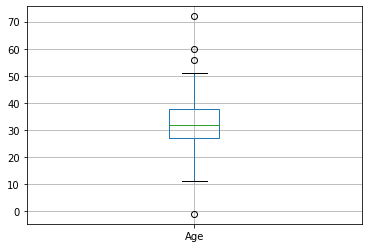

In [95]:
test.boxplot(column="Age")

## Creating X

In [96]:
X_test_new = test.values[:,:]

In [97]:
X_test_new  = scaler.transform(X_test_new )
print(X_test_new)

[[ 1.25691562  0.49910528  1.26002156 ... -0.99710225  1.38846784
   2.48557482]
 [-0.86609683 -2.0035853   1.26002156 ... -0.99710225  0.19770328
   2.48557482]
 [-1.35602278 -2.0035853   1.26002156 ... -0.99710225  0.19770328
  -0.40232142]
 ...
 [ 0.44037237  0.49910528  1.26002156 ...  0.38695491  0.19770328
  -0.40232142]
 [ 2.40007618 -2.0035853  -0.79363722 ...  0.38695491  0.19770328
  -0.40232142]
 [-1.02940548  0.49910528  1.26002156 ...  0.38695491 -0.99306128
  -0.40232142]]


In [101]:
Y_pred_prob=model_DecisionTree_tune.predict_proba(X_test_new)
print(Y_pred_prob)

[[0.34615385 0.65384615]
 [0.34615385 0.65384615]
 [0.09090909 0.90909091]
 [0.33333333 0.66666667]
 [0.73333333 0.26666667]
 [0.53846154 0.46153846]
 [0.34615385 0.65384615]
 [0.93333333 0.06666667]
 [1.         0.        ]
 [0.125      0.875     ]
 [0.29411765 0.70588235]
 [0.66666667 0.33333333]
 [0.55555556 0.44444444]
 [0.53846154 0.46153846]
 [0.94736842 0.05263158]
 [0.19230769 0.80769231]
 [0.33333333 0.66666667]
 [0.73333333 0.26666667]
 [0.79310345 0.20689655]
 [0.79310345 0.20689655]
 [0.55555556 0.44444444]
 [0.47368421 0.52631579]
 [0.53846154 0.46153846]
 [0.05882353 0.94117647]
 [1.         0.        ]
 [0.52941176 0.47058824]
 [0.09090909 0.90909091]
 [0.04761905 0.95238095]
 [0.         1.        ]
 [0.375      0.625     ]
 [0.90243902 0.09756098]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.04761905 0.95238095]
 [1.         0.        ]
 [0.53846154 0.46153846]
 [0.72222222 0.27777778]
 [0.27777778 0.72222222]


In [102]:
y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]


In [103]:
# Y_pred_prob.shape

## Importing in submission file

In [104]:
df1=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\data\sample.csv",header=0)
df1.head(10)

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No
5,6,No
6,7,Yes
7,8,No
8,9,No
9,10,Yes


In [105]:
# df1.drop(["Unnamed: 0"],axis=1,inplace=True)

In [106]:
df1.columns

Index(['S.No ', 'treatment'], dtype='object')

In [107]:
df1["treatment"]=y_pred_class

In [108]:
df1.head()

,S.No,treatment
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0


In [109]:
df1['treatment']=df1['treatment'].replace([0], "No")
df1['treatment']=df1['treatment'].replace([1], "Yes")

In [110]:
df1.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [111]:
df1.columns

Index(['S.No ', 'treatment'], dtype='object')

In [112]:
df1.to_csv(r"C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\data\sample.csv",index=False,header=True)

## Dumping Models

In [113]:
## saving model:
pickle.dump(classifier,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\log.pkl','wb'))
pickle.dump(classifier_SGD,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\sgd.pkl','wb'))
pickle.dump(classifier_SGD_tune,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\sgd_tune.pkl','wb'))
pickle.dump(model_KNN,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\knn.pkl','wb'))
pickle.dump(model_KNN_tune,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\knn_tune.pkl','wb'))
pickle.dump(svc_model,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\svc.pkl','wb'))
pickle.dump(model_SVC_tune,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\svc_tune.pkl','wb'))
pickle.dump(model_DecisionTree,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\dt.pkl','wb'))
pickle.dump(model_DecisionTree_tune,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\dt_tune.pkl','wb'))
pickle.dump(model_RandomForest,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\rt.pkl','wb'))
pickle.dump(model_RandomForest_tune,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\rt_tune.pkl','wb'))
pickle.dump(ensemble,open(r'C:\Users\VISHAL\Web Deployment\Mental Or Physical Disease Treatment\models\ensemble.pkl','wb'))